In [1]:
import GPRutils
import vK2KGPR
import plotGPR

import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import astropy.stats as stats

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
dataC = GPRutils.dataContainer()
dataC.load()
dataC.splitData(nSigma=4, train_size=0.80)

Exposure: 364215
Band: z
Number of objects: 110646


INFO: Query finished. [astroquery.utils.tap.core]
There were 10847 matches within 0.5 arcsec.
110359 total detections
8446 training set detections
2112 validation set detections
99801 prediiction set detections


In [3]:
GP = vK2KGPR.vonKarman2KernelGPR(dataC, printing=True, outDir=".")
# GP.fitCorr()
# GP.optimize()

In [4]:
params = np.array([
    6.0052269,
    4.1389713,
    0.0271109,
    0.0624530,
    -0.0014108
])

In [5]:
GP.fit(params)

/home/fortino/DESworkspace/vonkarmanFT.py:65: RuntimeWarning: divide by zero encountered in true_divide
  airy = (j1(kR)/(kR))**2
/home/fortino/DESworkspace/vonkarmanFT.py:65: RuntimeWarning: invalid value encountered in true_divide
  airy = (j1(kR)/(kR))**2
/home/fortino/DESworkspace/vonkarmanFT.py:75: RuntimeWarning: divide by zero encountered in true_divide
  w = np.where(kWind==0, 1., np.sin(kWind) / kWind)
/home/fortino/DESworkspace/vonkarmanFT.py:75: RuntimeWarning: invalid value encountered in true_divide
  w = np.where(kWind==0, 1., np.sin(kWind) / kWind)


AttributeError: 'dataContainer' object has no attribute 'Etrain'

In [ ]:
GP.predict(GP.dC.Xvalid)

In [ ]:
dataC.saveNPZ("..")

/home/fortino/DESworkspace/GPRutils.py:607: RuntimeWarning: invalid value encountered in true_divide
  sumWeights_x / sumWeights,
/home/fortino/DESworkspace/GPRutils.py:611: RuntimeWarning: invalid value encountered in true_divide
  sumWeights_y / sumWeights,
/home/fortino/DESworkspace/GPRutils.py:615: RuntimeWarning: divide by zero encountered in reciprocal
  sumWeights**-1.,
/home/fortino/DESworkspace/GPRutils.py:626: RuntimeWarning: invalid value encountered in less
  sumWeights < (maxErr**2.).value)
/home/fortino/DESworkspace/GPRutils.py:633: RuntimeWarning: invalid value encountered in greater
  RMS_x = np.std(sumWeights_x[sumWeights > 0.])*u.mas
/home/fortino/DESworkspace/GPRutils.py:634: RuntimeWarning: invalid value encountered in greater
  RMS_y = np.std(sumWeights_y[sumWeights > 0.])*u.mas
/home/fortino/DESworkspace/GPRutils.py:635: RuntimeWarning: invalid value encountered in greater
  noise = np.sqrt(np.mean(sumWeights[sumWeights > 0.]))*u.mas


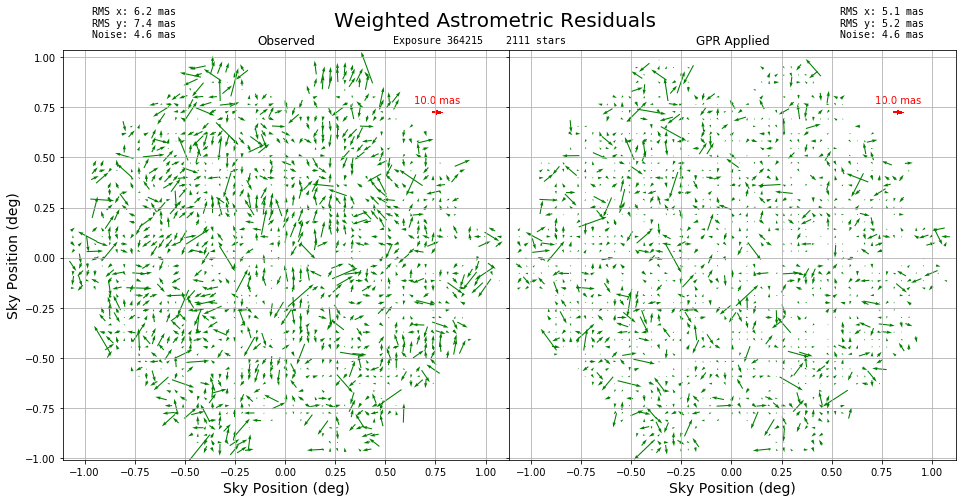

/home/fortino/DESworkspace/GPRutils.py:607: RuntimeWarning: invalid value encountered in true_divide
  sumWeights_x / sumWeights,
/home/fortino/DESworkspace/GPRutils.py:611: RuntimeWarning: invalid value encountered in true_divide
  sumWeights_y / sumWeights,
/home/fortino/DESworkspace/GPRutils.py:615: RuntimeWarning: divide by zero encountered in reciprocal
  sumWeights**-1.,
/home/fortino/DESworkspace/GPRutils.py:626: RuntimeWarning: invalid value encountered in less
  sumWeights < (maxErr**2.).value)
/home/fortino/DESworkspace/GPRutils.py:633: RuntimeWarning: invalid value encountered in greater
  RMS_x = np.std(sumWeights_x[sumWeights > 0.])*u.mas
/home/fortino/DESworkspace/GPRutils.py:634: RuntimeWarning: invalid value encountered in greater
  RMS_y = np.std(sumWeights_y[sumWeights > 0.])*u.mas
/home/fortino/DESworkspace/GPRutils.py:635: RuntimeWarning: invalid value encountered in greater
  noise = np.sqrt(np.mean(sumWeights[sumWeights > 0.]))*u.mas


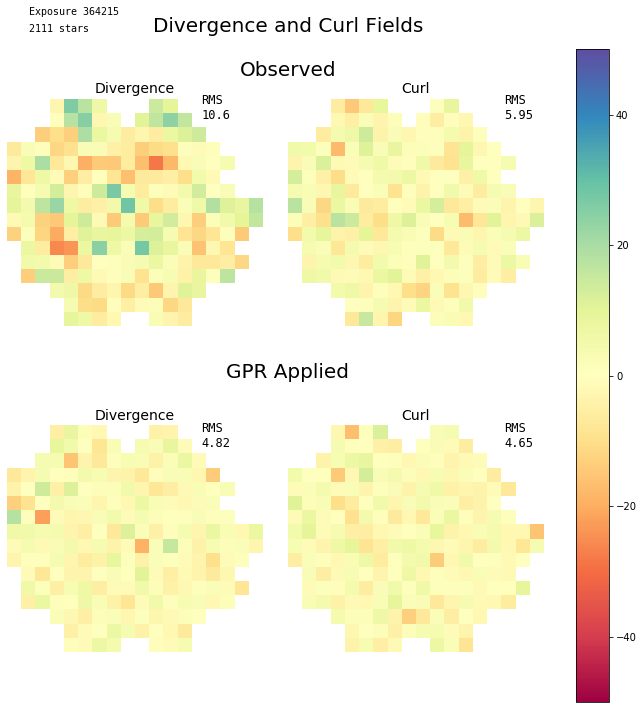

/home/fortino/DESworkspace/GPRutils.py:775: RuntimeWarning: invalid value encountered in true_divide
  logr /= counts
/home/fortino/DESworkspace/GPRutils.py:781: RuntimeWarning: invalid value encountered in true_divide
  xiplus /= counts
/home/fortino/DESworkspace/GPRutils.py:786: RuntimeWarning: invalid value encountered in true_divide
  xiz2 /= counts
/home/fortino/DESworkspace/GPRutils.py:795: RuntimeWarning: invalid value encountered in true_divide
  ximinus /= counts
/home/fortino/DESworkspace/plotGPR.py:499: RuntimeWarning: invalid value encountered in less_equal
  ind = np.where(r <= sep.to(u.deg).value)[0]


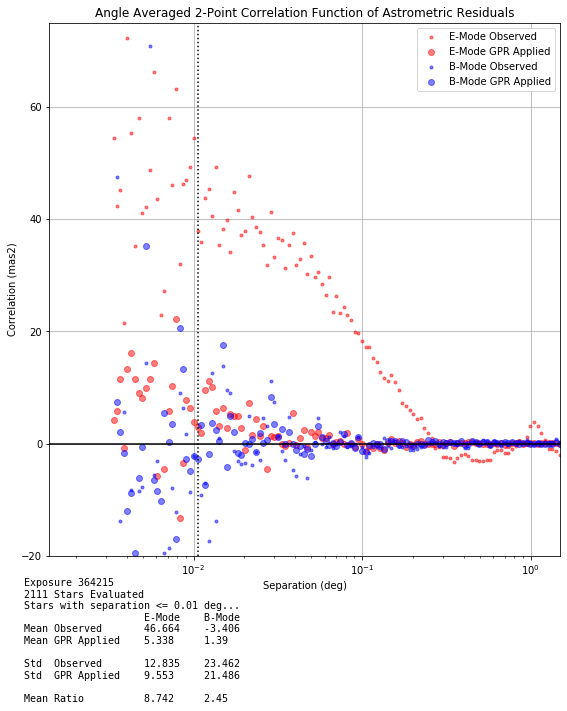

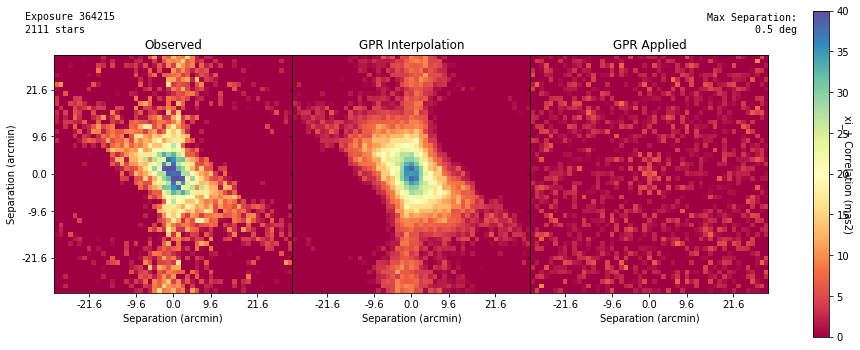

In [11]:
dataC.quickPlot(savePath="preclipping")

In [12]:
mask = stats.sigma_clip(
    dataC.Yvalid - dataC.fbar_s,
    sigma=4, axis=0).mask
mask = ~np.logical_or(*mask.T)

dataC.Xvalid = dataC.Xvalid[mask]
dataC.Yvalid = dataC.Yvalid[mask]
dataC.Evalid = dataC.Evalid[mask]

In [13]:
GP.predict(GP.dC.Xtrain)

In [14]:
mask = stats.sigma_clip(
    dataC.Ytrain - dataC.fbar_s,
    sigma=4, axis=0).mask
mask = ~np.logical_or(*mask.T)

In [15]:
dataC.Xtrain = dataC.Xtrain[mask]
dataC.Ytrain = dataC.Ytrain[mask]
dataC.Etrain =  dataC.Etrain[mask]

In [16]:
# To do this second round of optimization we will need to redfine nData,
# nTrain, and, nValid. Maybe other things too?

In [17]:
# %%time
# GP.optimize(v0=params)

In [18]:
params2 = np.array([
    2.22243044e+01,
    1.89448632e+00,
    -4.56342809e-04,
    9.20082711e-02,
    1.85203931e-03
])

In [19]:
GP.fit(params2)

/home/fortino/DESworkspace/vonkarmanFT.py:65: RuntimeWarning: divide by zero encountered in true_divide
  airy = (j1(kR)/(kR))**2
/home/fortino/DESworkspace/vonkarmanFT.py:65: RuntimeWarning: invalid value encountered in true_divide
  airy = (j1(kR)/(kR))**2
/home/fortino/DESworkspace/vonkarmanFT.py:75: RuntimeWarning: divide by zero encountered in true_divide
  w = np.where(kWind==0, 1., np.sin(kWind) / kWind)
/home/fortino/DESworkspace/vonkarmanFT.py:75: RuntimeWarning: invalid value encountered in true_divide
  w = np.where(kWind==0, 1., np.sin(kWind) / kWind)


In [20]:
GP.predict(GP.dC.Xvalid)

/home/fortino/DESworkspace/GPRutils.py:607: RuntimeWarning: invalid value encountered in true_divide
  sumWeights_x / sumWeights,
/home/fortino/DESworkspace/GPRutils.py:611: RuntimeWarning: invalid value encountered in true_divide
  sumWeights_y / sumWeights,
/home/fortino/DESworkspace/GPRutils.py:615: RuntimeWarning: divide by zero encountered in reciprocal
  sumWeights**-1.,
/home/fortino/DESworkspace/GPRutils.py:626: RuntimeWarning: invalid value encountered in less
  sumWeights < (maxErr**2.).value)
/home/fortino/DESworkspace/GPRutils.py:633: RuntimeWarning: invalid value encountered in greater
  RMS_x = np.std(sumWeights_x[sumWeights > 0.])*u.mas
/home/fortino/DESworkspace/GPRutils.py:634: RuntimeWarning: invalid value encountered in greater
  RMS_y = np.std(sumWeights_y[sumWeights > 0.])*u.mas
/home/fortino/DESworkspace/GPRutils.py:635: RuntimeWarning: invalid value encountered in greater
  noise = np.sqrt(np.mean(sumWeights[sumWeights > 0.]))*u.mas


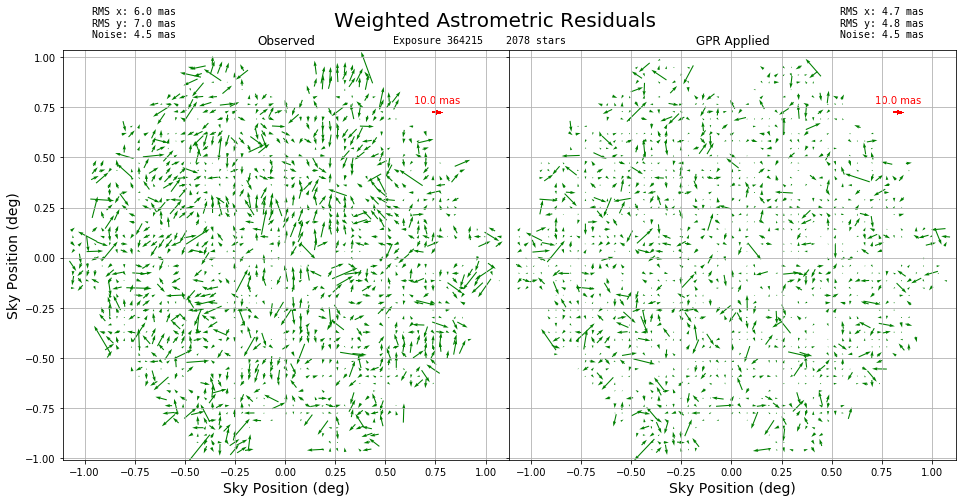

/home/fortino/DESworkspace/GPRutils.py:607: RuntimeWarning: invalid value encountered in true_divide
  sumWeights_x / sumWeights,
/home/fortino/DESworkspace/GPRutils.py:611: RuntimeWarning: invalid value encountered in true_divide
  sumWeights_y / sumWeights,
/home/fortino/DESworkspace/GPRutils.py:615: RuntimeWarning: divide by zero encountered in reciprocal
  sumWeights**-1.,
/home/fortino/DESworkspace/GPRutils.py:626: RuntimeWarning: invalid value encountered in less
  sumWeights < (maxErr**2.).value)
/home/fortino/DESworkspace/GPRutils.py:633: RuntimeWarning: invalid value encountered in greater
  RMS_x = np.std(sumWeights_x[sumWeights > 0.])*u.mas
/home/fortino/DESworkspace/GPRutils.py:634: RuntimeWarning: invalid value encountered in greater
  RMS_y = np.std(sumWeights_y[sumWeights > 0.])*u.mas
/home/fortino/DESworkspace/GPRutils.py:635: RuntimeWarning: invalid value encountered in greater
  noise = np.sqrt(np.mean(sumWeights[sumWeights > 0.]))*u.mas


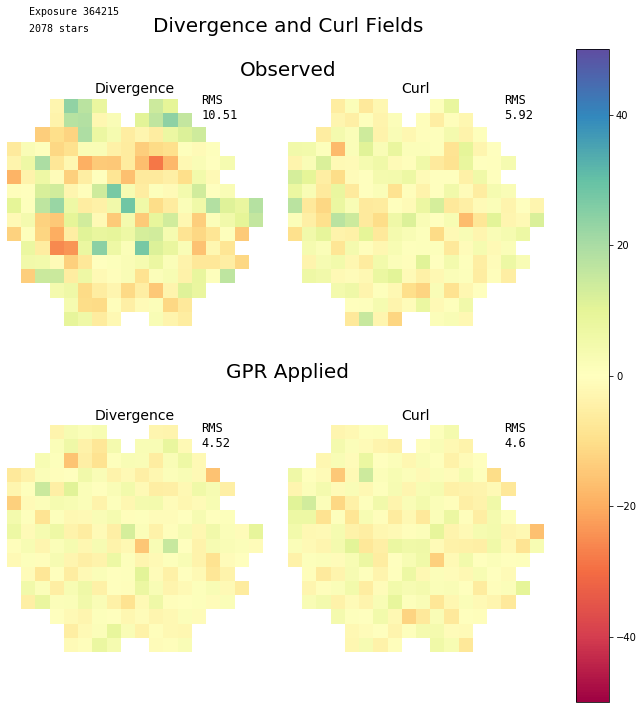

/home/fortino/DESworkspace/GPRutils.py:775: RuntimeWarning: invalid value encountered in true_divide
  logr /= counts
/home/fortino/DESworkspace/GPRutils.py:781: RuntimeWarning: invalid value encountered in true_divide
  xiplus /= counts
/home/fortino/DESworkspace/GPRutils.py:786: RuntimeWarning: invalid value encountered in true_divide
  xiz2 /= counts
/home/fortino/DESworkspace/GPRutils.py:795: RuntimeWarning: invalid value encountered in true_divide
  ximinus /= counts
/home/fortino/DESworkspace/plotGPR.py:499: RuntimeWarning: invalid value encountered in less_equal
  ind = np.where(r <= sep.to(u.deg).value)[0]


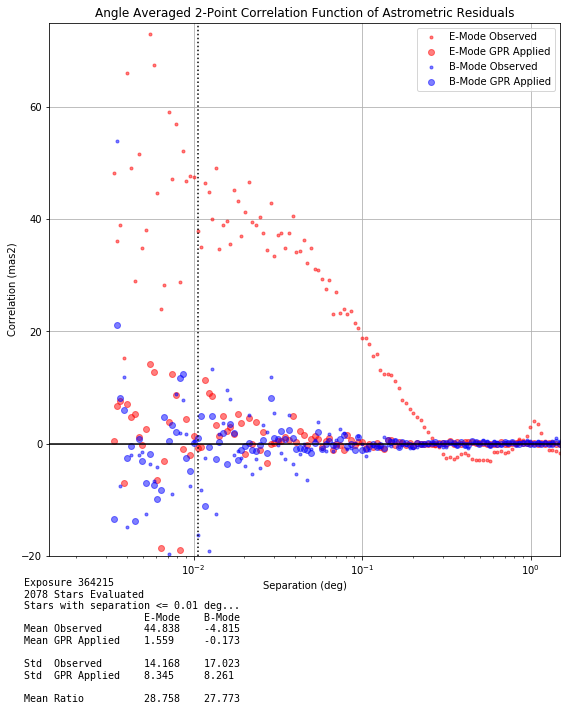

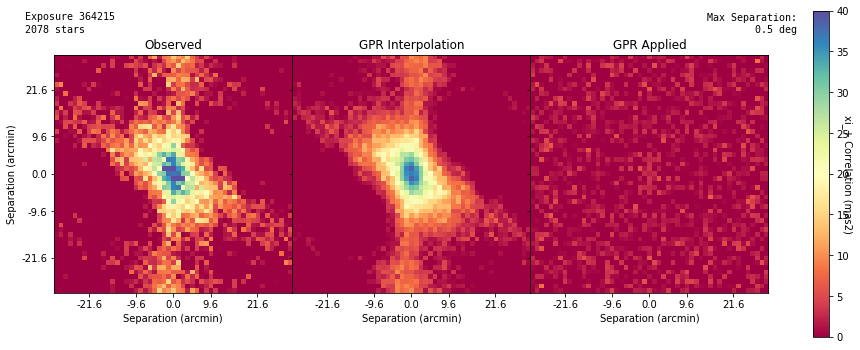

In [21]:
dataC.quickPlot(savePath="postclipping")